In [50]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
%matplotlib inline
import math
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score

In [12]:
df=pd.read_csv(r"C:\Users\hegde\Downloads\Video_Games_Sales_as_at_22_Dec_2016.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [14]:
df.head()

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [22]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [23]:
df['User_Score'].value_counts()

tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [24]:
df['Rating'].value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [25]:
df.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [26]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [28]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


# Handling Missing Values

In [31]:
df['Publisher'].fillna('Unknown',inplace=True)

In [42]:
df['Critic_Score'].fillna(df['Critic_Score'].mean(),inplace=True)

In [33]:
df['Critic_Count'].fillna(df['Critic_Count'].mode()[0],inplace=True)

In [34]:
df['User_Score'].fillna(df['User_Score'].mode()[0],inplace=True)

In [36]:
df['User_Score'].replace('tbd',0,inplace=True)

In [37]:
df['User_Score']=df['User_Score'].astype(float)

In [38]:
df['User_Count'].fillna(df['User_Count'].mode()[0],inplace=True)

In [39]:
df['Developer'].fillna('Unknown',inplace=True)

In [40]:
df['Rating'].fillna('No Rating',inplace=True)

In [41]:
df['Year_of_Release'].fillna(df['Year_of_Release'].mode()[0],inplace=True)

In [43]:
df.dropna(inplace=True)

In [44]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

# Correlation

In [67]:
X_features=df.drop(['Global_Sales','Year_of_Release','Name','Platform','Publisher','Developer','Rating','Genre'],axis=1)
X_features.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count'],
      dtype='object')

In [68]:
#Add constant intercept term 1 to dataset
X=sm.add_constant(X_features)
y=df['Global_Sales']

In [69]:
X

,const,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,1.0,41.36,28.96,3.77,8.45,76.0,51.0,8.0,322.0
1,1.0,29.08,3.58,6.81,0.77,70.0,4.0,0.0,4.0
2,1.0,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0
3,1.0,15.61,10.93,3.28,2.95,80.0,73.0,8.0,192.0
4,1.0,11.27,8.89,10.22,1.00,70.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...
16714,1.0,0.00,0.00,0.01,0.00,70.0,4.0,0.0,4.0
16715,1.0,0.00,0.01,0.00,0.00,70.0,4.0,0.0,4.0
16716,1.0,0.00,0.00,0.01,0.00,70.0,4.0,0.0,4.0
16717,1.0,0.01,0.00,0.00,0.00,70.0,4.0,0.0,4.0


In [74]:
train_X.count()

const           13373
NA_Sales        13373
EU_Sales        13373
JP_Sales        13373
Other_Sales     13373
Critic_Score    13373
Critic_Count    13373
User_Score      13373
User_Count      13373
dtype: int64

In [71]:
#split data into train and test
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,random_state=42)

In [75]:
#fit the regression model
mlr_model=sm.OLS(train_y,train_X).fit()
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS              Adj. R-squared:     1.000       
Dependent Variable: Global_Sales     AIC:                -102667.8372
Date:               2023-09-29 16:46 BIC:                -102600.3282
No. Observations:   13373            Log-Likelihood:     51343.      
Df Model:           8                F-statistic:        1.210e+08   
Df Residuals:       13364            Prob (F-statistic): 0.00        
R-squared:          1.000            Scale:              2.7105e-05  
----------------------------------------------------------------------
                 Coef.   Std.Err.      t       P>|t|    [0.025  0.975]
----------------------------------------------------------------------
const            0.0005    0.0003      1.4037  0.1604  -0.0002  0.0011
NA_Sales         1.0000    0.0001  11455.0946  0.0000   0.9998  1.0001
EU_Sales         1.0000    0.0002   6113.0307  0.0000   0.9997  1.0004
JP_Sales         0.9997    0.0002   5901.6063  0.0000   0.9994  1.0001
Other_Sales      0.9997    0.0003   3032.1251  0.0000   0.9991  1.0004
Critic_Score    -0.0000    0.0000     -0.4153  0.6779  -0.0000  0.0000
Critic_Count     0.0000    0.0000      0.1926  0.8473  -0.0000  0.0000
User_Score      -0.0000    0.0000     -1.2800  0.2006  -0.0001  0.0000
User_Count      -0.0000    0.0000     -1.5316  0.1257  -0.0000  0.0000
---------------------------------------------------------------------
Omnibus:              182.697        Durbin-Watson:           1.983  
Prob(Omnibus):        0.000          Jarque-Bera (JB):        335.630
Skew:                 0.040          Prob(JB):                0.000  
Kurtosis:             3.772          Condition No.:           2902   
=====================================================================
* The condition number is large (3e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [76]:
#coefficients
mlr_model.params

const           4.735447e-04
NA_Sales        9.999597e-01
EU_Sales        1.000046e+00
JP_Sales        9.997444e-01
Other_Sales     9.997235e-01
Critic_Score   -2.055784e-06
Critic_Count    7.309079e-07
User_Score     -2.077593e-05
User_Count     -2.115965e-07
dtype: float64

In [55]:
#t and p-values
print(mlr_model.tvalues,'\n',mlr_model.pvalues)

const               1.403736
NA_Sales        11455.094610
EU_Sales         6113.030729
JP_Sales         5901.606296
Other_Sales      3032.125119
Critic_Score       -0.415324
Critic_Count        0.192601
User_Score         -1.279969
User_Count         -1.531556
dtype: float64 
 const           0.160421
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Critic_Score    0.677911
Critic_Count    0.847274
User_Score      0.200578
User_Count      0.125656
dtype: float64


In [56]:
(mlr_model.rsquared,mlr_model.rsquared_adj)

(0.999986195927628, 0.9999861876641906)

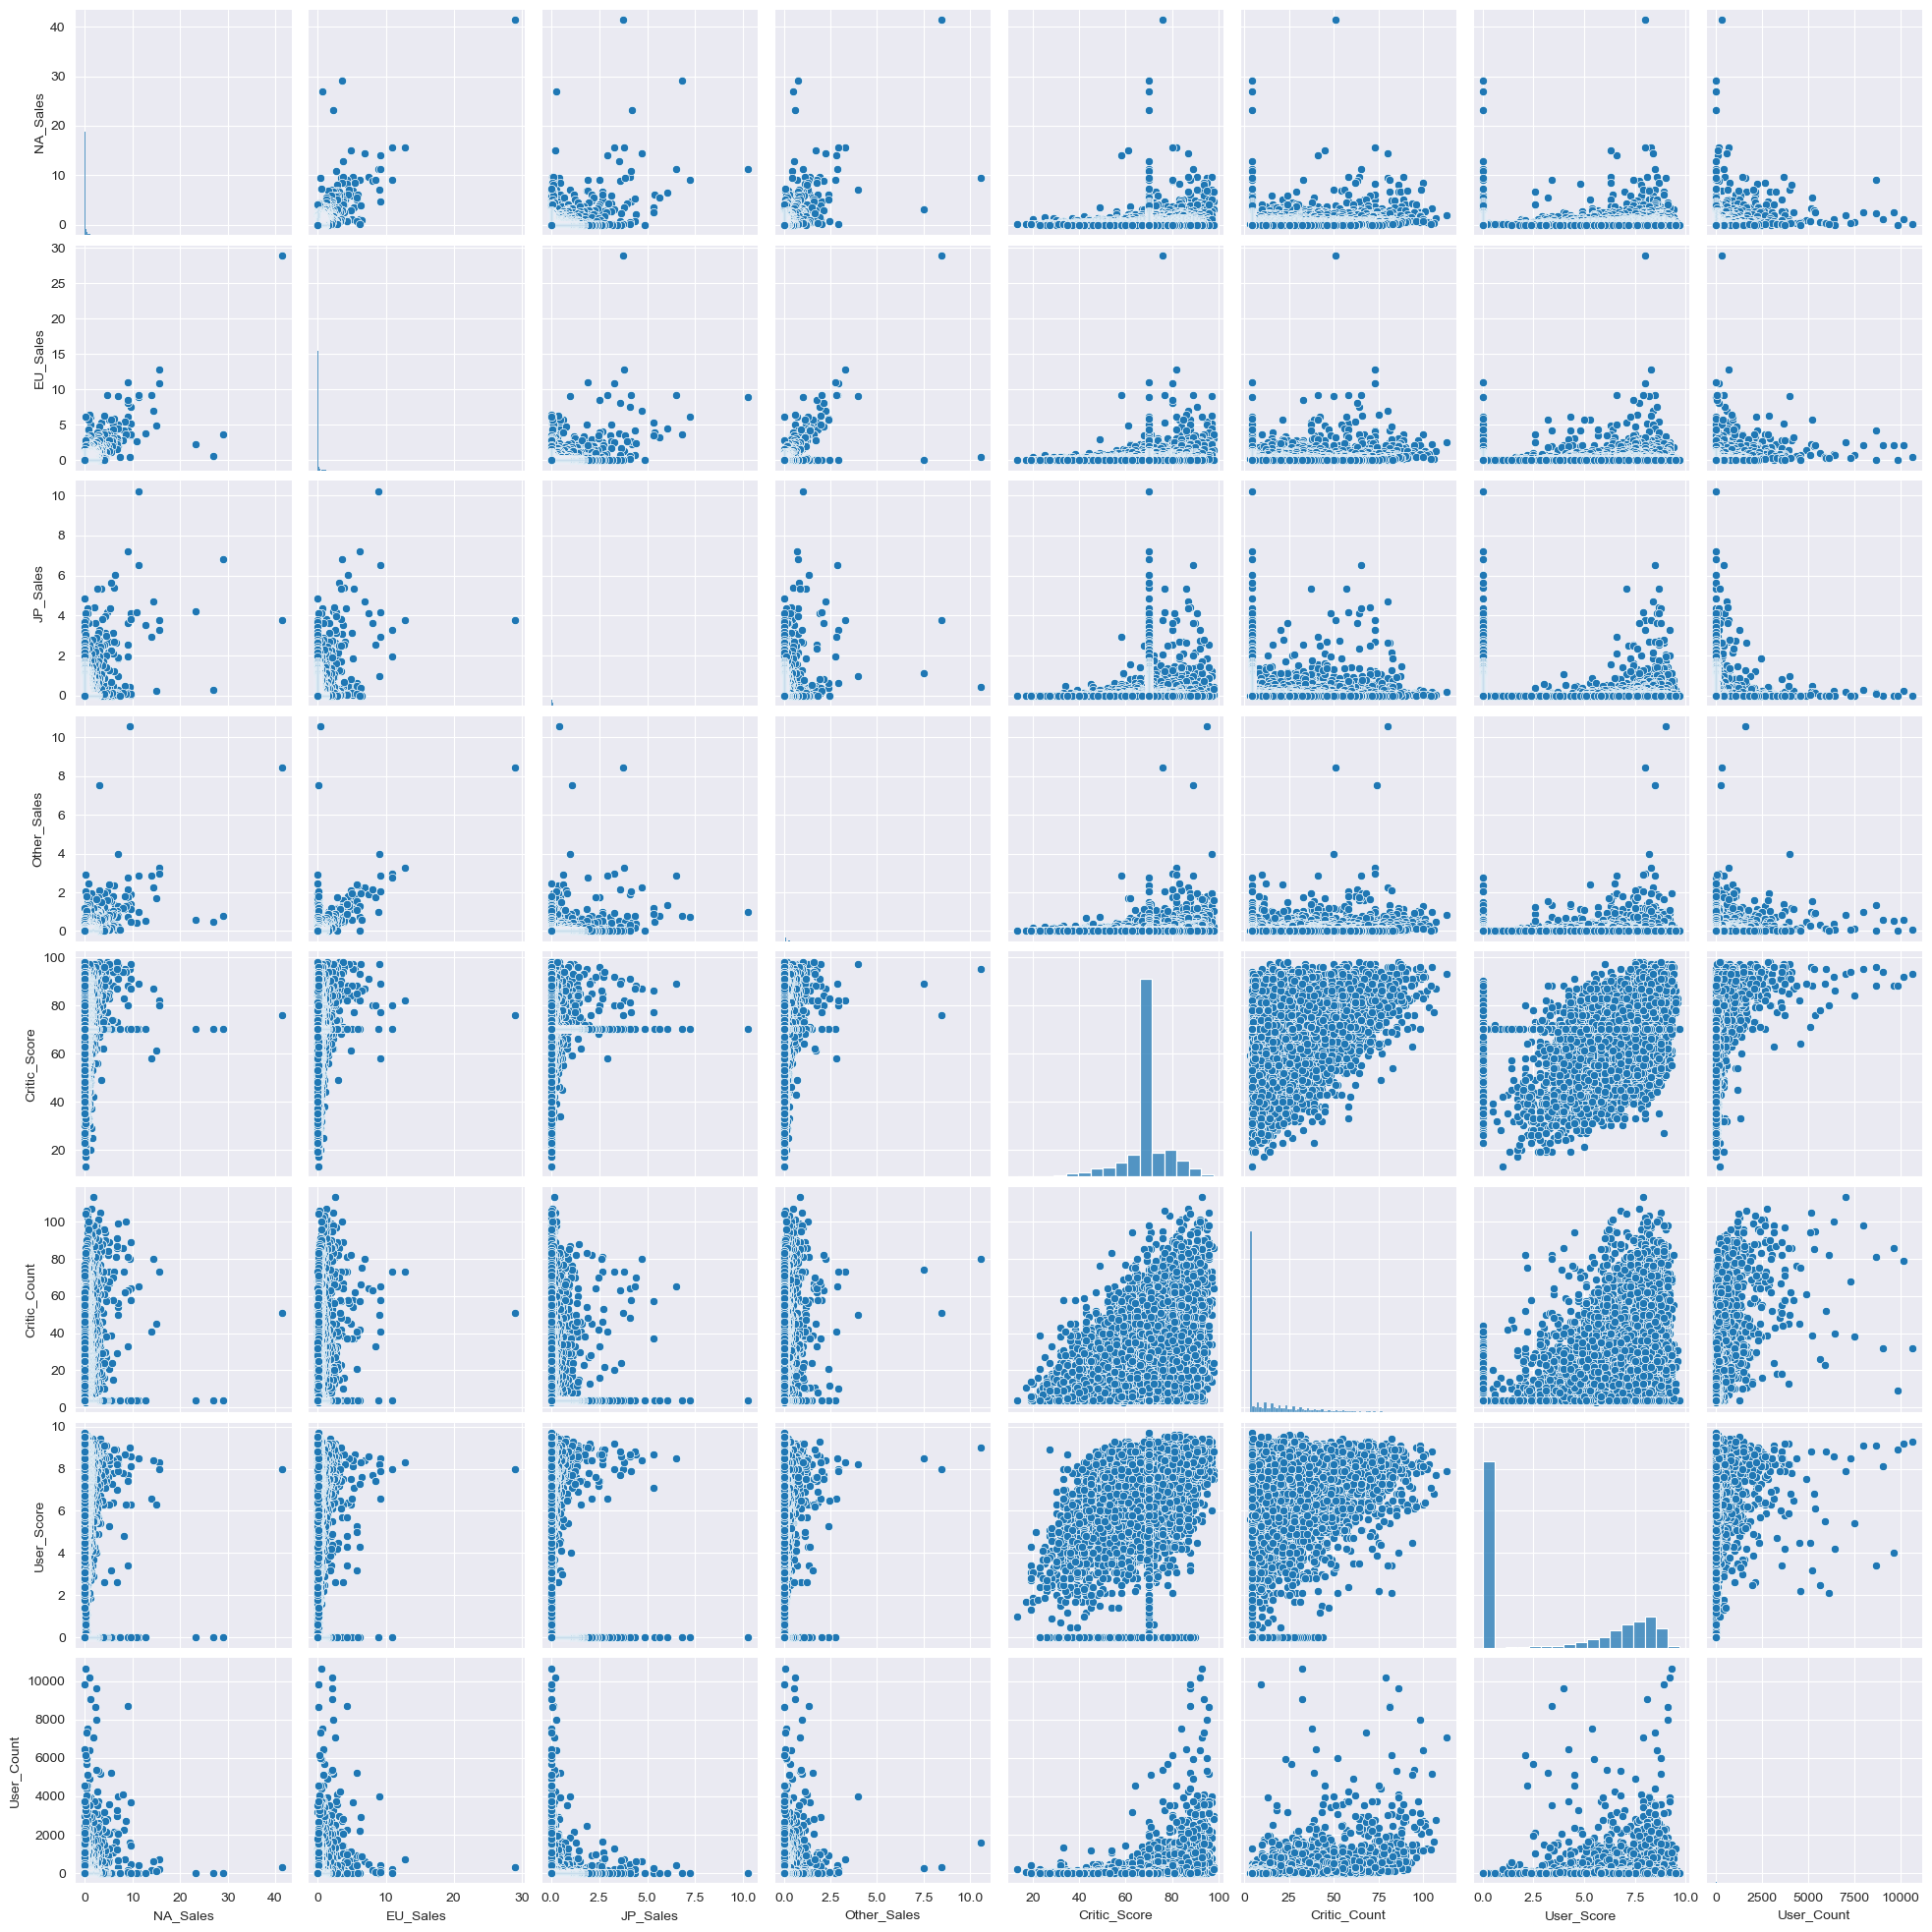

In [57]:
sns.set_style(style='darkgrid')
sns.pairplot(X_features)

In [63]:
X_features.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count
NA_Sales,1.000000,0.765343,0.449673,0.638700,0.179149,0.242847,0.139471,0.210757
EU_Sales,0.765343,1.000000,0.435087,0.722800,0.187733,0.265864,0.152562,0.273944
JP_Sales,0.449673,0.435087,1.000000,0.291098,0.095018,0.036536,-0.032017,0.033110
Other_Sales,0.638700,0.722800,0.291098,1.000000,0.177678,0.263496,0.165172,0.250196
Critic_Score,0.179149,0.187733,0.095018,0.177678,1.000000,0.290524,0.202014,0.252612
Critic_Count,0.242847,0.265864,0.036536,0.263496,0.290524,1.000000,0.653345,0.399928
User_Score,0.139471,0.152562,-0.032017,0.165172,0.202014,0.653345,1.000000,0.203387
User_Count,0.210757,0.273944,0.033110,0.250196,0.252612,0.399928,0.203387,1.000000


In [61]:
y_model_prediction=mlr_model.predict(test_X)
actual_to_predicted=pd.DataFrame(columns=[test_y,round(y_model_prediction,2)])
print(actual_to_predicted)

Empty DataFrame
Columns: [(0.45, 0.45), (0.04, 0.04), (0.11, 0.12), (0.52, 0.52), (0.28, 0.29), (0.06, 0.05), (0.49, 0.49), (0.1, 0.1), (0.25, 0.25), (0.66, 0.66), (0.18, 0.18), (0.06, 0.06), (0.61, 0.61), (0.11, 0.11), (4.36, 4.37), (0.13, 0.14), (0.39, 0.39), (0.72, 0.72), (0.08, 0.09), (0.16, 0.16), (0.16, 0.16), (0.16, 0.16), (1.01, 1.01), (11.68, 11.68), (0.02, 0.02), (0.06, 0.06), (0.04, 0.04), (0.56, 0.55), (0.1, 0.1), (0.02, 0.02), (0.04, 0.04), (0.08, 0.08), (0.07, 0.07), (0.37, 0.37), (0.05, 0.05), (0.17, 0.16), (0.26, 0.25), (0.33, 0.32), (0.11, 0.11), (0.61, 0.6), (0.03, 0.03), (0.33, 0.33), (1.15, 1.15), (0.15, 0.14), (0.97, 0.98), (0.07, 0.07), (0.04, 0.04), (0.08, 0.08), (0.11, 0.11), (1.07, 1.07), (1.6, 1.6), (4.06, 4.05), (1.75, 1.75), (2.42, 2.42), (0.43, 0.43), (0.62, 0.62), (0.01, 0.01), (0.2, 0.19), (0.05, 0.04), (0.07, 0.07), (0.1, 0.1), (0.04, 0.04), (0.15, 0.15), (5.12, 5.12), (0.45, 0.45), (3.59, 3.58), (0.01, 0.01), (2.21, 2.21), (0.93, 0.94), (0.17, 0.17), (0